In [1]:
import pandas as pd
import numpy as np
import re
import unidecode
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
np.random.seed(23)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

[nltk_data] Downloading package stopwords to /home/greca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
train = train.drop(columns=['id'])
train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## No preprocessing

In [3]:
minority_classes = train[train['label'] == 1]
minority_classes.shape

(2242, 2)

In [4]:
f = open('no_preprocessing.txt', 'w+')

messages_nopreprocessing = minority_classes['tweet'].tolist()

for tweet in messages_nopreprocessing:
    
    f.write('1\t'+str(tweet)+'\n')

## Using preprocessing

In [5]:
def remove_username(text):
    text = re.sub(r'\@[^\s]+', ' ', text)
    
    return text

def remove_newline(text):
    text = text.replace('\n', ' ')
    
    return text

def only_letters(text):
    text = re.sub(r'[^A-Za-z]+', ' ', text)
    
    return text

def remove_link(text):
    text = re.sub(r'www\.?[^\s]+', ' ', text)
    
    return text

def remove_hyperlink(text):
    text = re.sub(r'\<.?\>', ' ', text)
    
    return text

def remove_accent(text):
    text = unidecode.unidecode(text)
    
    return text

def adjustment_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    return text

def remove_stopwords(text):
    text = [word for word in text.split() if word not in sw]
    text = ' '.join(text)
    
    return text

def remove_spam(text):
    text = re.sub(r'\&amp', ' ', text)
    text = re.sub(r'\&lt', ' ', text)
    text = re.sub(r'\&gt', ' ', text)
    text = re.sub(r'\#follow|\#followme|\#like|\#f4f|\#photooftheday', ' ', text)
    
    return text

def remove_slangs(text):
    text = re.sub(r' b4 ', ' before ', text)
    text = re.sub(r' 2b ', ' to be ', text)
    text = re.sub(r' 2morrow ', ' tomorrow ', text)
    text = re.sub(r' rn ', ' right now ', text)
    text = re.sub(r' brb ', ' be right back ', text)
    text = re.sub(r' mb ', ' my bad ', text)
    text = re.sub(r' luv ', ' love ', text)
    text = re.sub(r' b ', ' be ', text)
    text = re.sub(r' r ', ' are ', text)
    text = re.sub(r' u ', ' you ', text)
    text = re.sub(r' y ', ' why ', text)
    text = re.sub(r' ur ', ' your ', text)
    text = re.sub(r' hbd ', ' happy birthday ', text)
    text = re.sub(r' bday ', ' birthday ', text)
    text = re.sub(r' bihday ', ' birthday ', text)
    text = re.sub(r' omg ', ' oh my god ', text)
    text = re.sub(r' lol ', ' laughing out loud ', text)
    
    return text

def remove_abbreviations(text):
    text = re.sub(r" can\'t ", " can not ", text)
    text = re.sub(r" i\'m ", " i am ", text)
    text = re.sub(r" i\'ll ", " i will ", text)
    text = re.sub(r" i\'d ", " i would ", text)
    text = re.sub(r" i\'ve ", " i have ", text)
    text = re.sub(r" ain\'t ", " am not ", text)
    text = re.sub(r" haven\'t ", " have not ", text)
    text = re.sub(r" hasn\'t ", " has not ", text)
    text = re.sub(r" can\'t ", " can not ", text)
    text = re.sub(r" won\'t ", " will not ", text)
    text = re.sub(r" you\'re ", " you are ", text)
    text = re.sub(r" we\'re ", " we are ", text)
    text = re.sub(r" they\'re ", " they are ", text)
    text = re.sub(r" he\'s ", " he is ", text)
    text = re.sub(r" she\'s ", " she is ", text)
    text = re.sub(r" it\'s ", " it is ", text)
    text = re.sub(r" don\'t ", " do not ", text)
    text = re.sub(r" doesn\'t ", " does not ", text)
    text = re.sub(r" wouldn\'t ", " would not ", text)
    text = re.sub(r" couldn\'t ", " could not ", text)
    text = re.sub(r" shouldn\'t ", " should not ", text)
    text = re.sub(r" no\-one ", " noone ", text)
    
    return text

def remove_one_len_word(text):
    text = re.sub(r'\b[a-z]\b', ' ', text)
    
    return text

def preprocessing(data):
    data['cleaned_tweet'] = data['tweet'].apply(str)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: x.lower())
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_newline)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_hyperlink)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_spam)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_link)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_username)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_accent)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_abbreviations)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(only_letters)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_slangs)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_stopwords)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_one_len_word)
    data['cleaned_tweet'] = data['cleaned_tweet'].apply(adjustment_text)
      
    return data

In [6]:
train_preprocessed = preprocessing(train)
train_preprocessed = train_preprocessed.drop_duplicates()
train_preprocessed = train_preprocessed.dropna()

In [7]:
minority_classes_preprocessed = train_preprocessed[train_preprocessed['label'] == 1]
minority_classes_preprocessed.shape

(2013, 3)

In [8]:
f = open('preprocessing.txt', 'w+')

messages_nopreprocessing = minority_classes_preprocessed['cleaned_tweet'].tolist()

for tweet in messages_nopreprocessing:
    
    if len(tweet.split()) > 1:
    
        f.write('1\t'+str(tweet)+'\n')

## EDA

### No preprocessing

In [9]:
majority_classes = train[train['label'] == 0]
majority_classes = majority_classes[['label', 'tweet']]
majority_classes

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...


In [10]:
f = open('no_preprocessing_augmented.txt', 'r+')
tweets_nopreprocessing = []

for line in f:
    _, tweet = line.split('\t')
    tweets_nopreprocessing.append(tweet)

minority_class_noprep_augmented = pd.DataFrame({
    'label': 1,
    'tweet': tweets_nopreprocessing
})

minority_class_noprep_augmented.head()

,label,tweet
0,1,user cnn calls michigan middle school build bo...
1,1,user cnn calls michigan middle school build th...
2,1,user cnn calls michigan middle school human bo...
3,1,user cnn calls michigan middle school build th...
4,1,user cnn calls michigan middle school build th...


In [11]:
full_data_noprep_augmented = pd.concat([majority_classes, minority_class_noprep_augmented], axis=0)
full_data_noprep_augmented.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
full_data_noprep_augmented.shape

(49898, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

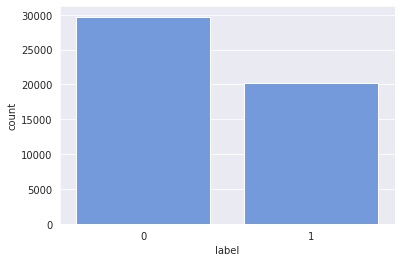

In [13]:
sns.countplot(data=full_data_noprep_augmented, x='label', color='cornflowerblue')

In [14]:
infos_noprep = pd.DataFrame({'Total': full_data_noprep_augmented['label'].value_counts(),
                             'Percentage': (full_data_noprep_augmented['label'].value_counts()/full_data_noprep_augmented.shape[0])*100})

infos_noprep

,Total,Percentage
0,29720,59.561505
1,20178,40.438495


In [21]:
full_data_noprep_augmented.to_csv('train_nopreprocessing_augmented.csv', index=False)

### Using preprocessing

In [15]:
majority_classes_preprocess = train_preprocessed[train_preprocessed['label'] == 0]
majority_classes_preprocess = majority_classes_preprocess[['label', 'cleaned_tweet']]
majority_classes_preprocess

,label,cleaned_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,birthday majesty
3,0,model love take time urd ddddd
4,0,factsguide society motivation
...,...,...
31956,0,fishing tomorrow carnt wait first time years
31957,0,ate isz youuu ddddddddda
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad


In [16]:
f = open('preprocessing_augmented.txt', 'r+')
tweets_preprocessing = []

for line in f:
    _, tweet = line.split('\t')
    tweets_preprocessing.append(tweet)

minority_class_prep_augmented = pd.DataFrame({
    'label': 1,
    'cleaned_tweet': tweets_nopreprocessing
})

minority_class_prep_augmented.head()

,label,cleaned_tweet
0,1,user cnn calls michigan middle school build bo...
1,1,user cnn calls michigan middle school build th...
2,1,user cnn calls michigan middle school human bo...
3,1,user cnn calls michigan middle school build th...
4,1,user cnn calls michigan middle school build th...


In [17]:
full_data_prep_augmented = pd.concat([majority_classes_preprocess, minority_class_prep_augmented], axis=0)
full_data_prep_augmented.head()

,label,cleaned_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,birthday majesty
3,0,model love take time urd ddddd
4,0,factsguide society motivation


In [18]:
full_data_prep_augmented.shape

(47695, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

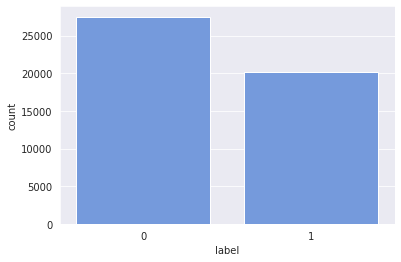

In [19]:
sns.countplot(data=full_data_prep_augmented, x='label', color='cornflowerblue')

In [20]:
infos_prep = pd.DataFrame({'Total': full_data_prep_augmented['label'].value_counts(),
                             'Percentage': (full_data_prep_augmented['label'].value_counts()/full_data_prep_augmented.shape[0])*100})

infos_prep

,Total,Percentage
0,27517,57.693679
1,20178,42.306321


## References

https://github.com/jasonwei20/eda_nlp